In [105]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

In [106]:
# describe the parameters
N = 1000000 
beta0 = 0.8
gamma = 0.05       
mu = 0.06
# Infected = 1
S0, I0, R0 = N-1, 1, 0  

In [107]:
def SIR(y0, t, N, beta0, gamma):
    S, I, R = y0
    dIdt = beta0 * I * S / N - gamma * I
    dSdt = -beta0 * S * I / N
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [108]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
# SIR 계산
y0 = S0, I0, R0
# ret = SIR(S0, I0, R0, t, N, beta0)
ret = odeint(SIR, y0, t, args=(N, beta0, gamma))
S, I, R = ret.T


In [109]:
def SIRgraph(t, S, I, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel('Time')

    ax.yaxis.set_tick_params(length = 0)
    ax.xaxis.set_tick_params(length = 0)
    ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
    plt.show();

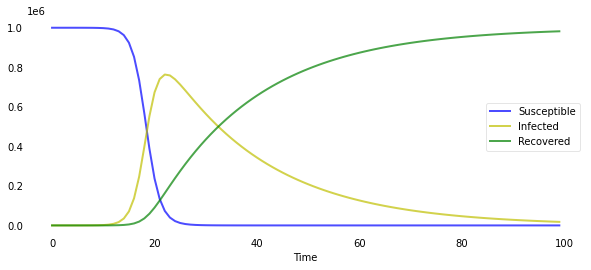

In [110]:
SIRgraph(t, S, I, R)

In [111]:
def SI(y1, t, N, alpha, beta0):
    S, I = y1
    dIdt = beta0*I*(N-I)/N
    dSdt = 1- dIdt
    
    return dSdt, dIdt

In [112]:
y1 = S0, I0
# ret = SIR(S0, I0, R0, t, N, beta0)
ret2 = odeint(SI, y1, t, args=(N, alpha, beta0))
S, I = ret2.T

In [113]:
def SIgraph(t, S, I):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')

    ax.set_xlabel('Time')

    ax.yaxis.set_tick_params(length = 0)
    ax.xaxis.set_tick_params(length = 0)
    ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
    plt.show();

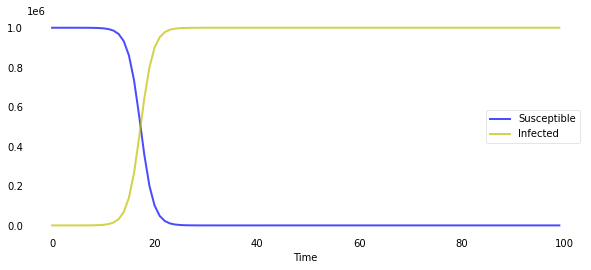

In [114]:
SIgraph(t, S, I)

In [115]:
def twofactor(y2, t, N, beta0, gamma, mu):
    S, I, R, Q = y2
    J = I + R
    beta = beta0*(math.pow(1- I/N, mu))
    dQdt = mu*S * J
    dSdt = -beta * S * I / N - dQdt
    dRdt = gamma * I
    dIdt = beta * I * S / N - gamma * I
    
    return dSdt, dIdt, dRdt, dQdt

In [116]:
# 임의 설정
Q0 = S0//2
S0 = S0 - Q0

y2 = S0, I0, R0, Q0
ret2 = odeint(twofactor, y2, t, args=(N, beta0, gamma, mu))
S, I, R, Q = ret2.T

In [117]:
def twofactor_graph(t, S, I, R, Q):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'r', alpha=0.7, linewidth=2, label='removal from infectious')
    ax.plot(t, Q, 'p', alpha=0.7, linewidth=2, label='removal from susceptible')

    ax.set_xlabel('Time')

    ax.yaxis.set_tick_params(length = 0)
    ax.xaxis.set_tick_params(length = 0)
    ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
    plt.show();

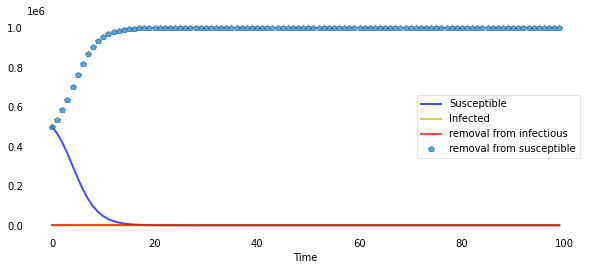

In [118]:
twofactor_graph(t, S, I, R, Q)